# Variable Discretization

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

**Discretization, or binning**, is the process of **transforming continuous variables into discrete
variables** by creating a set of contiguous intervals, also called bins, that span the range of
the variable values. Discretization is used to **change the distribution of skewed variables**
and to **minimize the influence of outliers**, and hence improve the performance of some
machine learning models.

In [3]:
boston = pd.read_csv("data/boston.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


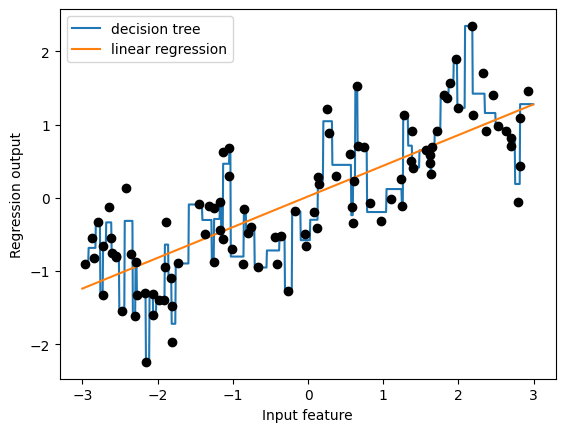

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from helpers.datasets import make_wave

X, y = make_wave(n_samples=100)

line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)

reg = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, reg.predict(line), label="decision tree")

reg = LinearRegression().fit(X, y)
plt.plot(line, reg.predict(line), label="linear regression")

plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.legend(loc="best")
plt.show()

## Dividing the variable into intervals of equal width

**In equal-width discretization, the variable values are sorted into intervals of the same
width.** 

    Width = (Max(X) - Min(X)) / Bins

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
data = boston.copy()

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

In [7]:
# Let's calculate the range of the LSTAT variable, that is, the difference between its maximum and minimum values:
lstat_range = X_train['LSTAT'].max() - X_train['LSTAT'].min()

# Let's determine the interval width, which is the variable's value range divided by the number of bins:
inter_width = int(lstat_range / 10)

# Let's capture in new variables, the rounded minimum and maximum values of LSTAT:
min_value = int(np.floor( X_train['LSTAT'].min()))
max_value = int(np.ceil( X_train['LSTAT'].max()))

print(min_value, max_value, inter_width)

#Let's create a list with the interval limits using list comprehension and print out the limits:
intervals = [i for i in range(min_value, max_value + inter_width, inter_width)]
print(intervals)

# Let's discretize LSTAT and capture the discretized variable in a new column in the dataframe:
X_train['lstat_disc'] = pd.cut(x=X_train['LSTAT'], bins=intervals, include_lowest=True)

#Let's print the top 10 observations of the discretized and original variable, side by side:
print(X_train[['LSTAT', 'lstat_disc']].head(10))

1 37 3
[1, 4, 7, 10, 13, 16, 19, 22, 25, 28, 31, 34, 37]
     LSTAT    lstat_disc
141  34.41  (34.0, 37.0]
272   7.73   (7.0, 10.0]
135  16.96  (16.0, 19.0]
298   4.97    (4.0, 7.0]
122  17.93  (16.0, 19.0]
22   18.72  (16.0, 19.0]
68   13.09  (13.0, 16.0]
20   21.02  (19.0, 22.0]
437  26.45  (25.0, 28.0]
14   10.26  (10.0, 13.0]


In [8]:
# Let's calculate the number of observations per interval:
print(X_train.groupby('lstat_disc')['LSTAT'].count())

lstat_disc
(0.999, 4.0]    28
(4.0, 7.0]      67
(7.0, 10.0]     63
(10.0, 13.0]    49
(13.0, 16.0]    44
(16.0, 19.0]    45
(19.0, 22.0]    21
(22.0, 25.0]    17
(25.0, 28.0]     7
(28.0, 31.0]     9
(31.0, 34.0]     0
(34.0, 37.0]     4
Name: LSTAT, dtype: int64


In [9]:
# Now, let's discretize LSTAT in the test set using pandas' cut() method:
X_test['lstat_disc'] = pd.cut(x=X_test['LSTAT'], bins=intervals, include_lowest=True)

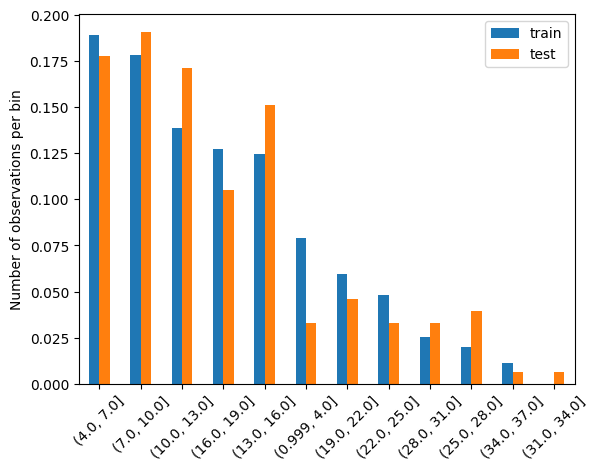

In [10]:
t1 = X_train['lstat_disc'].value_counts() / len(X_train)
t2 = X_test['lstat_disc'].value_counts() / len(X_test)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')
plt.show()

In [11]:
from sklearn.preprocessing import KBinsDiscretizer

data = boston.copy()

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

# Let's create an equal-width discretizer with scikit-learn by setting its strategy to uniform:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')

In [12]:
disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [13]:
train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

In [14]:
# We can inspect the bin boundaries learned by the transformer
disc.bin_edges_

array([array([ 1.73 ,  5.255,  8.78 , 12.305, 15.83 , 19.355, 22.88 , 26.405,
              29.93 , 33.455, 36.98 ])                                       ,
       array([ 1.1742 ,  2.26943,  3.36466,  4.45989,  5.55512,  6.65035,
               7.74558,  8.84081,  9.93604, 11.03127, 12.1265 ])         ,
       array([3.561 , 4.0829, 4.6048, 5.1267, 5.6486, 6.1705, 6.6924, 7.2143,
              7.7362, 8.2581, 8.78  ])                                       ],
      dtype=object)

In [20]:
X_train.loc[:,['LSTAT', 'DIS', 'RM']]

,LSTAT,DIS,RM
141,34.41,1.4394,5.019
272,7.73,3.9175,6.538
135,16.96,2.1107,6.335
298,4.97,7.8278,6.345
122,17.93,2.0869,5.961
...,...,...,...
323,11.74,4.7211,5.708
192,2.87,6.4798,7.178
117,10.30,2.7474,6.021
47,18.80,5.6894,6.030


In [15]:
train_t

array([[9., 0., 2.],
       [1., 2., 5.],
       [4., 0., 5.],
       ...,
       [2., 1., 4.],
       [4., 4., 4.],
       [3., 1., 3.]])

- Equal Width doesn’t improve the value spread
- It can handle outliers
- Can be combined with categorical encodings

## Sorting the variable values in intervals of equal frequency

In [21]:
data = boston.copy()

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

In [23]:
disc = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='quantile')

disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

In [24]:
disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
              18.06 , 22.453, 36.98 ])                                       ,
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
               3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ])         ,
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
              6.794 , 7.185 , 8.78  ])                                       ],
      dtype=object)

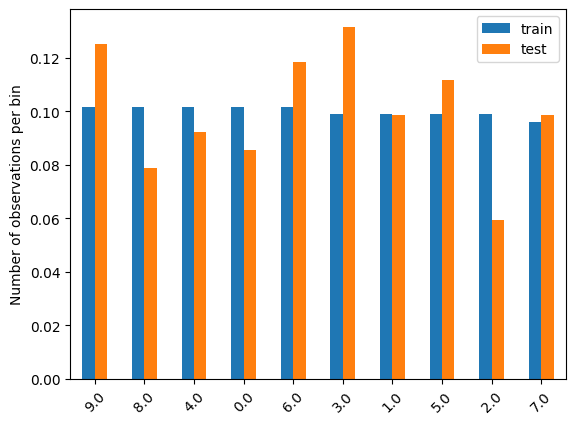

In [25]:
X_train = pd.DataFrame(train_t, columns =['LSTAT', 'DIS', 'RM'])
X_test = pd.DataFrame(test_t, columns =['LSTAT', 'DIS', 'RM'])
t1 = X_train['LSTAT'].value_counts() / len(X_train)
t2 = X_test['LSTAT'].value_counts() / len(X_test)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')
plt.show()

- Equal Frequency does improve the value spread
- It can handle outliers
- Can be combined with categorical encoding

## Performing discretization followed by categorical encoding

In [26]:
data = boston.copy()

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

In [34]:
disc = KBinsDiscretizer(n_bins=10, encode='onehot', strategy='quantile')

disc.fit(X_train[['LSTAT', 'DIS', 'RM']])

train_t = disc.transform(X_train[['LSTAT', 'DIS', 'RM']])
test_t = disc.transform(X_test[['LSTAT', 'DIS', 'RM']])

In [35]:
disc.bin_edges_

array([array([ 1.73 ,  4.623,  6.202,  7.528,  9.5  , 11.16 , 13.26 , 15.565,
              18.06 , 22.453, 36.98 ])                                       ,
       array([ 1.1742 ,  1.66132,  1.9793 ,  2.26121,  2.64774,  3.2157 ,
               3.7965 ,  4.45352,  5.40702,  6.8147 , 12.1265 ])         ,
       array([3.561 , 5.5783, 5.8532, 5.9628, 6.1048, 6.2155, 6.3946, 6.5632,
              6.794 , 7.185 , 8.78  ])                                       ],
      dtype=object)

In [36]:
train_t

<354x30 sparse matrix of type '<class 'numpy.float64'>'
	with 1062 stored elements in Compressed Sparse Row format>

- `onehot`: Encode the transformed result with one-hot encoding and return a sparse matrix. Ignored features are always stacked to the right.
- `onehot-dense`: Encode the transformed result with one-hot encoding and return a dense array. Ignored features are always stacked to the right.

## Allocating the variable values in arbitrary intervals

In [37]:
data = boston.copy()

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

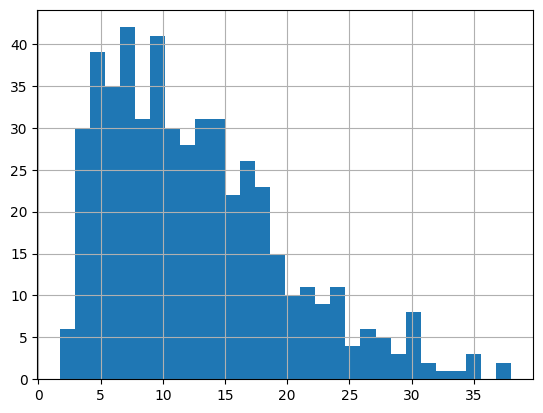

In [38]:
data['LSTAT'].hist(bins=30)
plt.show()

In [39]:
# Let's create a list with the arbitrary interval limits, setting the upper limit to infinity to accommodate bigger values:
intervals = [0, 10, 20, 30, np.Inf]

# Let's create a list with the interval limits as labels, that is, strings:
labels = ['0-10', '10-20', '20-30', '>30']

# Let's discretize the LSTAT variable
data['lstat_labels'] = pd.cut(data['LSTAT'], bins=intervals, labels=labels, include_lowest=True)
data['lstat_intervals'] = pd.cut(data['LSTAT'], bins=intervals, labels=None, include_lowest=True)

data[['LSTAT','lstat_labels', 'lstat_intervals']].head(10)

,LSTAT,lstat_labels,lstat_intervals
0,4.98,0-10,"(-0.001, 10.0]"
1,9.14,0-10,"(-0.001, 10.0]"
2,4.03,0-10,"(-0.001, 10.0]"
3,2.94,0-10,"(-0.001, 10.0]"
4,5.33,0-10,"(-0.001, 10.0]"
5,5.21,0-10,"(-0.001, 10.0]"
6,12.43,10-20,"(10.0, 20.0]"
7,19.15,10-20,"(10.0, 20.0]"
8,29.93,20-30,"(20.0, 30.0]"
9,17.10,10-20,"(10.0, 20.0]"


In [40]:
data['lstat_intervals'].value_counts()

(-0.001, 10.0]    219
(10.0, 20.0]      213
(20.0, 30.0]       62
(30.0, inf]        12
Name: lstat_intervals, dtype: int64

## Using decision trees for discretization

In [41]:
from sklearn.tree import DecisionTreeRegressor

data = boston.copy()

X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

# Let's assemble a decision tree to predict the MEDV target, setting the maximum depth to 3 and random_state for reproducibility
tree_model = DecisionTreeRegressor(max_depth=3, random_state=0)

# Let's fit the decision tree using the LSTAT variable to predict the MEDV target
tree_model.fit(X_train['LSTAT'].to_frame(), y_train)

X_train['lstat_tree'] = tree_model.predict(X_train['LSTAT'].to_frame())

# Let's explore the end leaves, that is, bins, the tree created:
X_train['lstat_tree'].unique()

array([12.91724138, 27.15384615, 16.36181818, 32.04285714, 20.555     ,
       34.88333333, 23.71388889, 41.80740741])

In [42]:
# Let's now discretize the LSTAT variable in the test set:
X_test['lstat_tree'] = tree_model.predict(X_test['LSTAT'].to_frame())

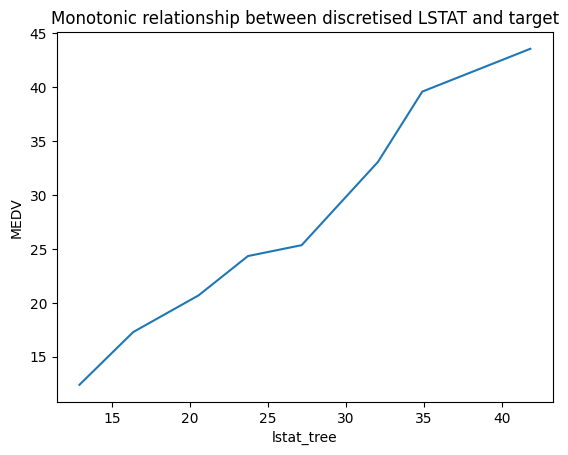

In [43]:
pd.concat([X_test, y_test],axis=1).groupby(['lstat_tree'])['MEDV'].mean().plot()
plt.title('Monotonic relationship between discretised LSTAT and target')
plt.ylabel('MEDV')
plt.show()

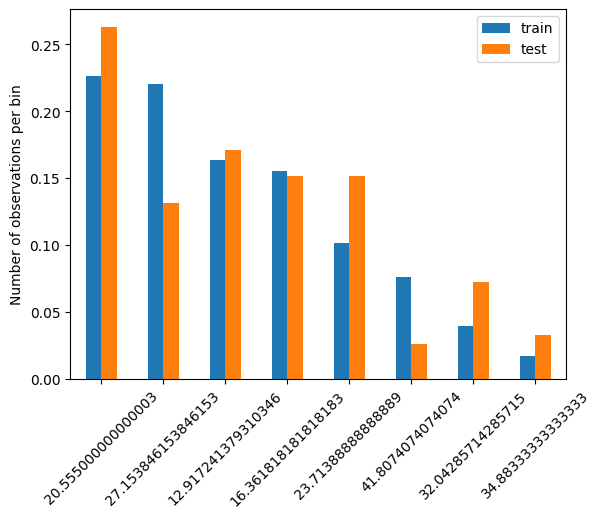

In [44]:
t1 = X_train['lstat_tree'].value_counts() / len(X_train)
t2 = X_test['lstat_tree'].value_counts() / len(X_test)
tmp = pd.concat([t1, t2], axis=1)
tmp.columns = ['train', 'test']
tmp.plot.bar()
plt.xticks(rotation=45)
plt.ylabel('Number of observations per bin')
plt.show()

In [46]:
from feature_engine.discretisation import DecisionTreeDiscretiser

treeDisc = DecisionTreeDiscretiser(cv=10, 
                                   scoring='neg_mean_squared_error',
                                   variables=['LSTAT', 'RM', 'DIS'], 
                                   regression=True, 
                                   param_grid={'max_depth': [1,2,3,4]})

treeDisc.fit(X_train, y_train)
treeDisc.binner_dict_['LSTAT'].best_params_

{'max_depth': 3}

In [47]:
train_t = treeDisc.transform(X_train)
test_t = treeDisc.transform(X_test)

In [48]:
train_t

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,lstat_tree
141,1.62864,0.0,21.89,0.0,0.624,18.684146,100.0,16.201587,4.0,437.0,21.2,396.90,12.917241,12.917241
272,0.11460,20.0,6.96,0.0,0.464,18.684146,58.7,24.162199,3.0,223.0,18.6,394.96,27.153846,27.153846
135,0.55778,0.0,21.89,0.0,0.624,18.684146,98.2,24.162199,4.0,437.0,21.2,394.67,16.361818,16.361818
298,0.06466,70.0,2.24,0.0,0.400,18.684146,20.1,24.162199,5.0,358.0,14.8,368.24,32.042857,32.042857
122,0.09299,0.0,25.65,0.0,0.581,18.684146,92.9,24.162199,2.0,188.0,19.1,378.09,16.361818,16.361818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,0.28392,0.0,7.38,0.0,0.493,18.684146,74.3,24.162199,5.0,287.0,19.6,391.13,20.555000,20.555000
192,0.08664,45.0,3.44,0.0,0.437,30.921277,26.3,24.162199,5.0,398.0,15.2,390.49,41.807407,41.807407
117,0.15098,0.0,10.01,0.0,0.547,18.684146,82.6,24.162199,6.0,432.0,17.8,394.51,20.555000,20.555000
47,0.22927,0.0,6.91,0.0,0.448,18.684146,85.5,24.162199,3.0,233.0,17.9,392.74,16.361818,16.361818


- Decision Tree does not improve the value spread
- It can handle outliers well as trees are robust to outliers.
- Creates monotonic relationships

## Example: Wave regression dataset 

In [49]:
from sklearn.preprocessing import KBinsDiscretizer

In [50]:
X, y = make_wave(n_samples=100)

kb = KBinsDiscretizer(n_bins=10, strategy='uniform')
kb.fit(X)
print("bin edges: \n", kb.bin_edges_)

bin edges: 
 [array([-2.9668673 , -2.37804841, -1.78922951, -1.20041062, -0.61159173,
        -0.02277284,  0.56604605,  1.15486494,  1.74368384,  2.33250273,
         2.92132162])                                                   ]


In [51]:
X_binned = kb.transform(X)
X_binned

<100x10 sparse matrix of type '<class 'numpy.float64'>'
	with 100 stored elements in Compressed Sparse Row format>

In [52]:
print(X[:10])
X_binned.toarray()[:10]

[[-0.75275929]
 [ 2.70428584]
 [ 1.39196365]
 [ 0.59195091]
 [-2.06388816]
 [-2.06403288]
 [-2.65149833]
 [ 2.19705687]
 [ 0.60669007]
 [ 1.24843547]]


array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]])

In [53]:
kb = KBinsDiscretizer(n_bins=10, strategy='uniform', encode='onehot-dense')
kb.fit(X)
X_binned = kb.transform(X)

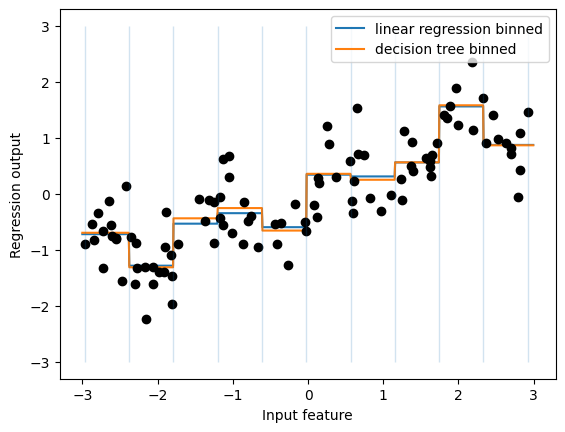

In [54]:
line_binned = kb.transform(line)

reg = LinearRegression().fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='linear regression binned')

reg = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, reg.predict(line_binned), label='decision tree binned')
plt.plot(X[:, 0], y, 'o', c='k')
plt.vlines(kb.bin_edges_[0], -3, 3, linewidth=1, alpha=.2)
plt.legend(loc="best")
plt.ylabel("Regression output")
plt.xlabel("Input feature")
plt.show()